Evaluating Car Data Clustering Performance...


c:\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Evaluating Customer Data Clustering Performance...


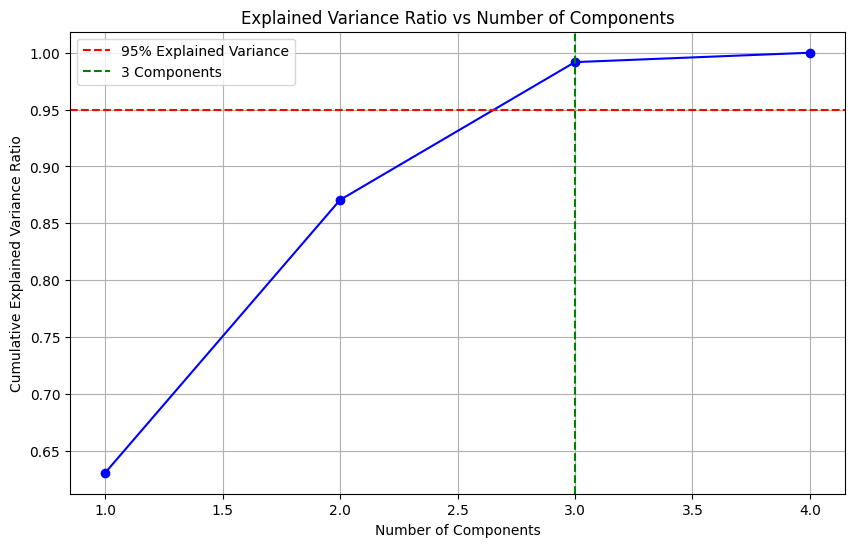

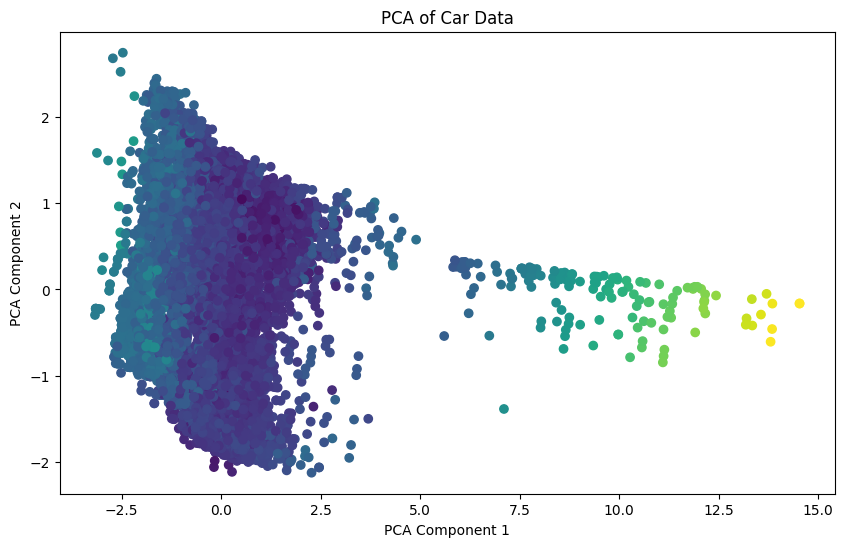

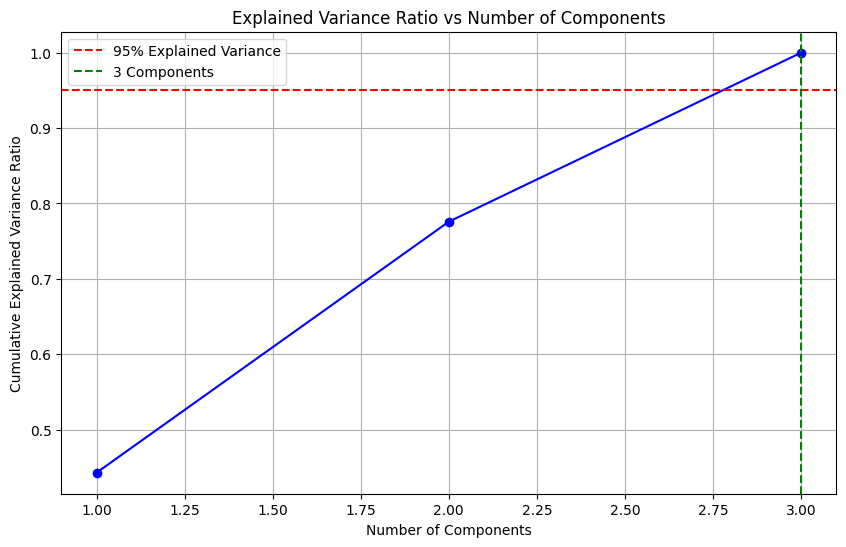

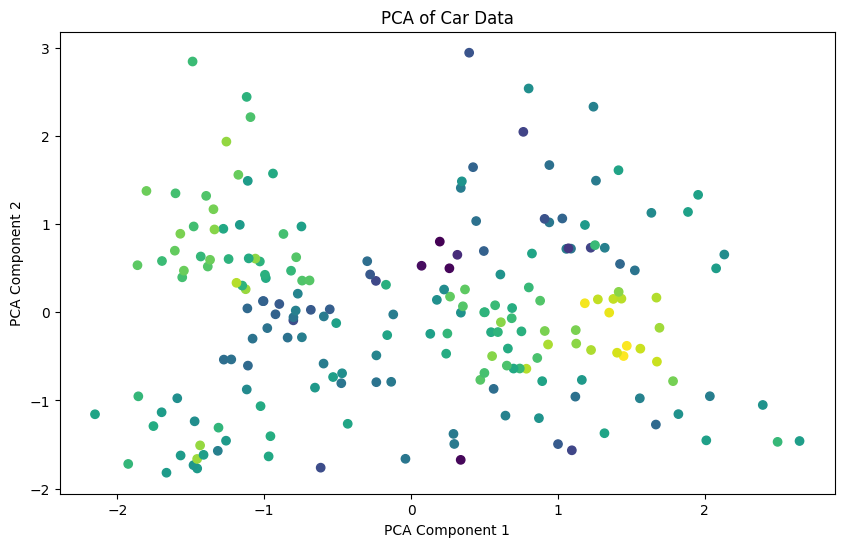

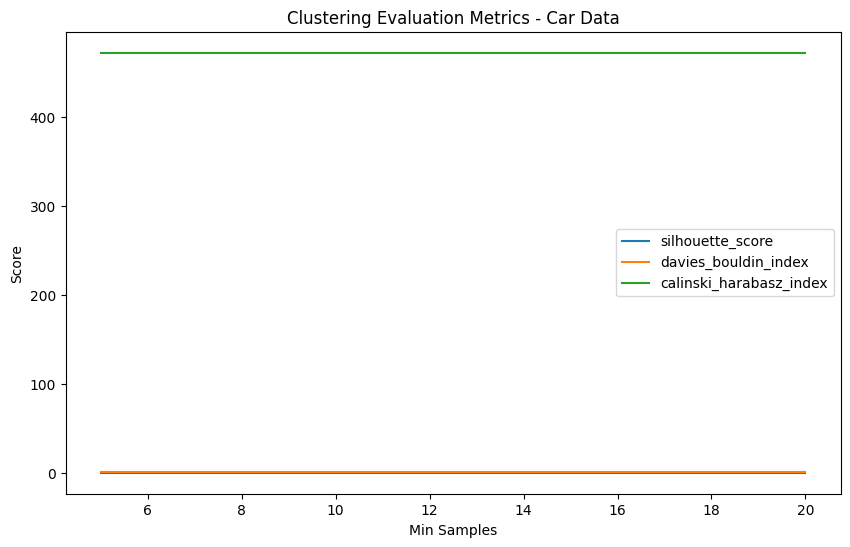

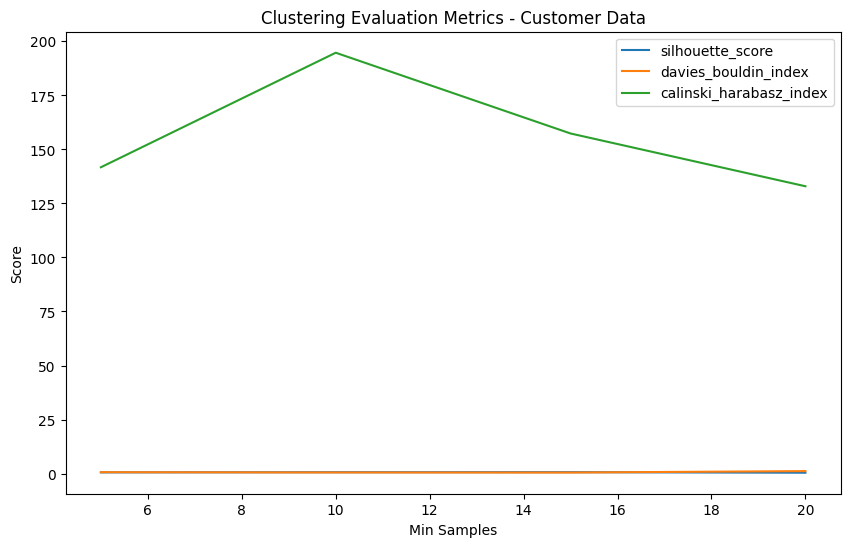

Car Data Clustering Metrics:
   silhouette_score  davies_bouldin_index  calinski_harabasz_index  \
0          0.337107              1.395446               471.818298   
1          0.337107              1.395446               471.818298   
2          0.337107              1.395446               471.818298   
3          0.337107              1.395446               471.818298   

   min_samples  
0            5  
1           10  
2           15  
3           20  

Customer Data Clustering Metrics:
   silhouette_score  davies_bouldin_index  calinski_harabasz_index  \
0          0.546187              0.637564               141.741335   
1          0.627342              0.506551               194.744310   
2          0.652614              0.470556               157.369434   
3          0.394985              1.144308               132.952634   

   min_samples  
0            5  
1           10  
2           15  
3           20  
Visualizing Best Clustering for Car Data...


c:\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


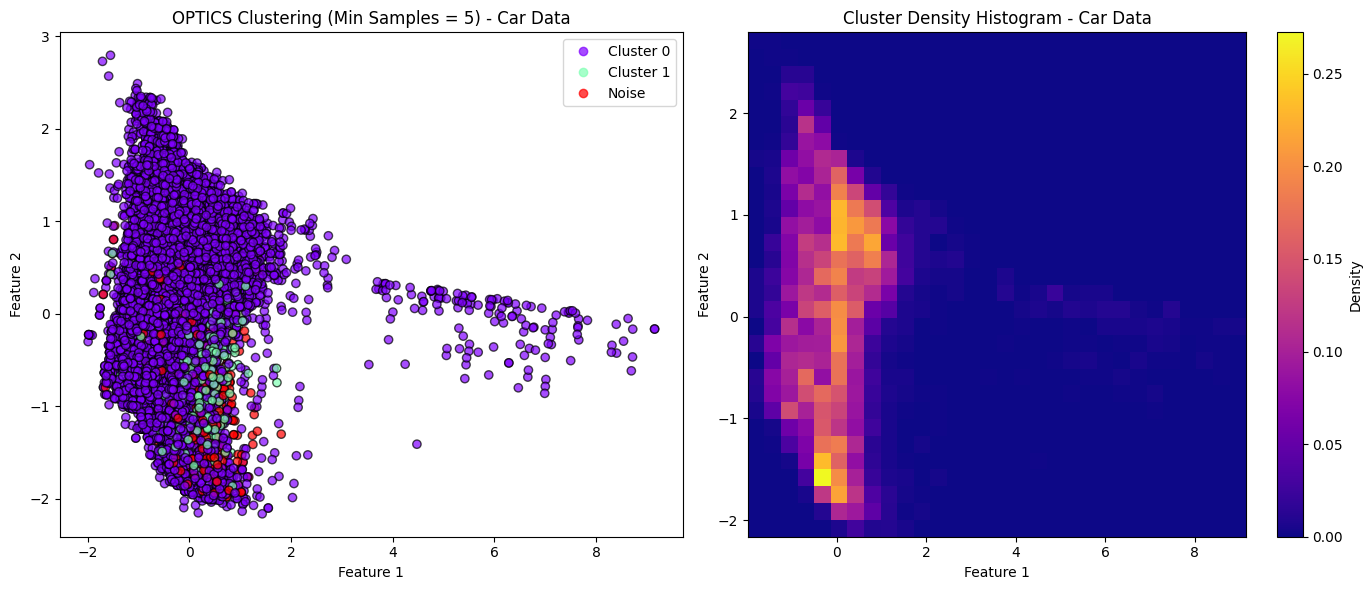

Visualizing Best Clustering for Customer Data...


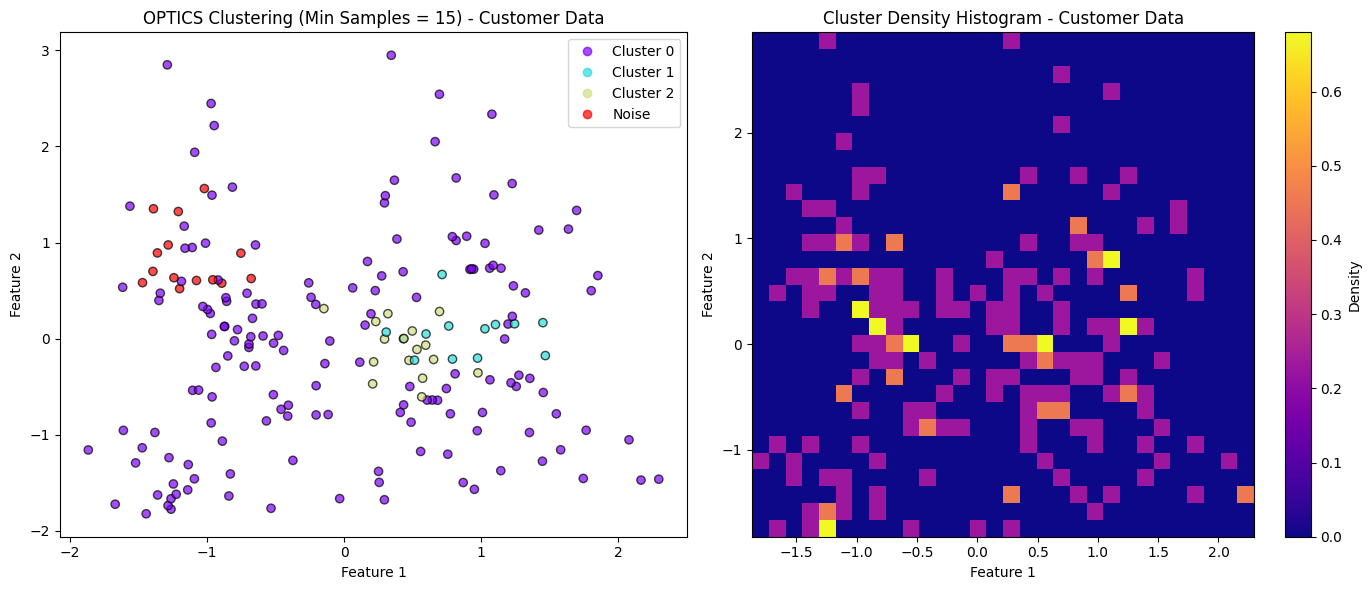

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
from src.prep import Prep

np.random.seed(47)

# Load and prepare data
prep = Prep(output_pca=True)
car_data = prep.prep_car
customer_data = prep.prep_customer

# Standardizing the data to improve clustering performance
scaler = StandardScaler()
car_data = pd.DataFrame(scaler.fit_transform(car_data), columns=car_data.columns)
customer_data = pd.DataFrame(scaler.fit_transform(customer_data), columns=customer_data.columns)

def evaluate_clustering_metrics(data, labels):
    """
    Compute clustering evaluation metrics.
    """
    valid_labels = labels[labels != -1]
    data_filtered = data.iloc[labels != -1]
    
    if len(set(valid_labels)) > 1:
        silhouette = silhouette_score(data_filtered, valid_labels)
        davies_bouldin = davies_bouldin_score(data_filtered, valid_labels)
        calinski_harabasz = calinski_harabasz_score(data_filtered, valid_labels)
    else:
        silhouette, davies_bouldin, calinski_harabasz = -1, -1, -1
    
    return {
        'silhouette_score': silhouette,
        'davies_bouldin_index': davies_bouldin,
        'calinski_harabasz_index': calinski_harabasz
    }

def apply_optics_clustering(data, min_samples=5, xi=0.05, min_cluster_size=0.05):
    """
    Apply OPTICS clustering and return labels.
    """
    clustering = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)
    clustering.fit(data)
    return clustering.labels_

def plot_metric_curves(metrics_df, title):
    plt.figure(figsize=(10, 6))
    for metric in ['silhouette_score', 'davies_bouldin_index', 'calinski_harabasz_index']:
        plt.plot(metrics_df['min_samples'], metrics_df[metric], label=metric)
    plt.xlabel('Min Samples')
    plt.ylabel('Score')
    plt.title(f'Clustering Evaluation Metrics - {title}')
    plt.legend()
    plt.show()

def evaluate_multiple_clusters(data, min_samples_range):
    """
    Evaluate clustering for different min_samples values.
    """
    results = []
    
    for min_samples in min_samples_range:
        labels = apply_optics_clustering(data, min_samples=min_samples)
        metrics = evaluate_clustering_metrics(data, labels)
        metrics['min_samples'] = min_samples
        results.append(metrics)
    
    return pd.DataFrame(results)

# Evaluate clustering performance
min_samples_range = [5, 10, 15, 20]
print("Evaluating Car Data Clustering Performance...")
car_metrics_df = evaluate_multiple_clusters(car_data, min_samples_range)
print("Evaluating Customer Data Clustering Performance...")
customer_metrics_df = evaluate_multiple_clusters(customer_data, min_samples_range)

# Plot metric curves
plot_metric_curves(car_metrics_df, 'Car Data')
plot_metric_curves(customer_metrics_df, 'Customer Data')

# Display metrics table
print("Car Data Clustering Metrics:")
print(car_metrics_df)
print("\nCustomer Data Clustering Metrics:")
print(customer_metrics_df)

# Identify best min_samples based on Silhouette Score
best_car_params = car_metrics_df.loc[car_metrics_df['silhouette_score'].idxmax(), 'min_samples']
best_customer_params = customer_metrics_df.loc[customer_metrics_df['silhouette_score'].idxmax(), 'min_samples']

def visualize_best_clustering(data, best_min_samples, title):
    """
    Visualize the best clustering results using a scatter plot and histogram density.
    """
    labels = apply_optics_clustering(data, min_samples=best_min_samples)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Scatter plot of clusters
    scatter = axes[0].scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='rainbow', edgecolor='k', alpha=0.7)
    axes[0].set_title(f"OPTICS Clustering (Min Samples = {best_min_samples}) - {title}")
    axes[0].set_xlabel("Feature 1")
    axes[0].set_ylabel("Feature 2")
    legend_labels = set(labels)
    axes[0].legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {l}' if l != -1 else 'Noise' for l in legend_labels])

    # Histogram grid density
    axes[1].hist2d(data.iloc[:, 0], data.iloc[:, 1], bins=30, cmap='plasma', density=True)
    axes[1].set_title(f"Cluster Density Histogram - {title}")
    axes[1].set_xlabel("Feature 1")
    axes[1].set_ylabel("Feature 2")
    plt.colorbar(axes[1].collections[0], ax=axes[1], label='Density')

    plt.tight_layout()
    plt.show()

print("Visualizing Best Clustering for Car Data...")
visualize_best_clustering(car_data, best_car_params, 'Car Data')
print("Visualizing Best Clustering for Customer Data...")
visualize_best_clustering(customer_data, best_customer_params, 'Customer Data')
